In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import copy
pd.set_option('display.max_columns', None)

# Seleccion de parametros a partir de la importancia de los atributos

In [2]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [3]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [4]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [5]:
Y = df_teams['result']

In [6]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [8]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [9]:
clf.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [10]:
Ypred = clf.predict(Xtest)

In [11]:
metrics.f1_score(Ytest, Ypred, average='macro')

0.9869618304400913

In [12]:
importance3 = clf.feature_importances_

In [13]:
feat_importances = pd.Series(clf.feature_importances_, index = X.columns)

<AxesSubplot:>

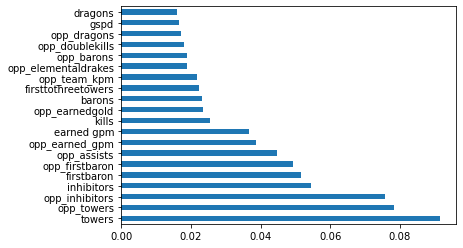

In [14]:
feat_importances.nlargest(20).plot(kind = 'barh')

In [15]:
feat_importances.sort_values(ascending = False, inplace = True)

In [16]:
f_i_l = feat_importances.tolist()

In [17]:
f_i_l_n = list(feat_importances.index)

In [18]:
feat_importance_list = [[f_i_l_n[i], f_i_l[i]] for i in range(len(f_i_l)) if i < 20]

### Modelo a unicamente con los 20 atributos mas importantes

In [19]:
feature_list = [x[0] for x in feat_importance_list]

In [20]:
X = df_teams[feature_list]

In [21]:
Y = df_teams['result']

In [22]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [24]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [25]:
clf_importance.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [26]:
Ypred = clf_importance.predict(Xtest)

In [27]:
metrics.f1_score(Ytest, Ypred, average='macro')

0.9910358717760694

### Cross validation con los mismios 20 atritbutos

In [28]:
X = df_teams[feature_list]

In [29]:
Y = df_teams['result']

In [30]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [31]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [32]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [33]:
cv_results

array([0.99127676, 0.98808578, 0.99203822, 0.99215071, 0.99923372,
       0.99221184, 0.99392097, 0.99386503, 0.99076923, 0.99139953])

In [34]:
cv_results_list = cv_results.tolist()

In [35]:
sorted_results = sorted(cv_results_list, reverse = True)

In [36]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9925 (+/- 0.0055)


In [37]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9992


In [38]:
feature_best = ("Best score: %0.4f" % (sorted_results[0]))

In [39]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9881


# Seleccion de parametros a partir de matriz de correlacion

In [40]:
correlation = df_teams.corr()

In [41]:
result_corr = correlation['result']

In [42]:
df_result = pd.DataFrame(result_corr)

In [43]:
df_result

,result
gamelength,-0.058379
result,1.000000
kills,0.649912
deaths,-0.712262
assists,0.650689
...,...
opp_minionkills,-0.084849
opp_monsterkills,-0.393583
opp_monsterkillsownjungle,-0.058098
opp_monsterkillsenemyjungle,-0.510468


In [44]:
names = df_result.index
names = names.tolist()

<BarContainer object of 113 artists>

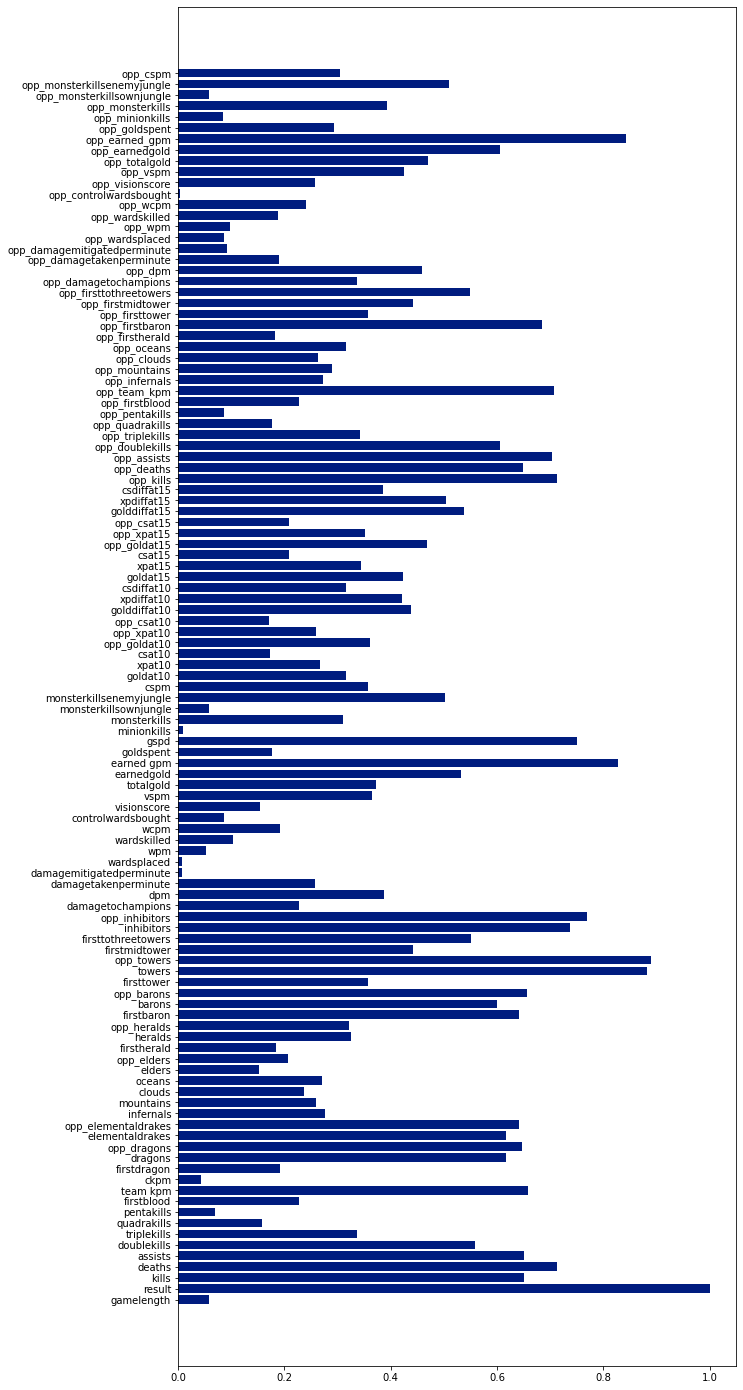

In [45]:
plt.figure(figsize = (10, 25))
#plt.xticks(rotation = 90)
plt.style.use('seaborn-dark-palette')
plt.barh(names, abs(result_corr))

In [46]:
result_corr_list = result_corr.tolist()

In [47]:
abs_result = [abs(x) for x in result_corr_list]

In [48]:
names_result = [[names[i], abs_result[i]] for i in range(len(abs_result))]

In [49]:
names_result.sort(key = lambda names_result : names_result[1], reverse = True)

In [50]:
above_thresh = [x for x in names_result if x[1] > 0.6 and x[1] < 1.0]

In [51]:
above_thresh_names = [x[0] for x in above_thresh]
above_thresh_values = [x[1] for x in above_thresh]

<BarContainer object of 24 artists>

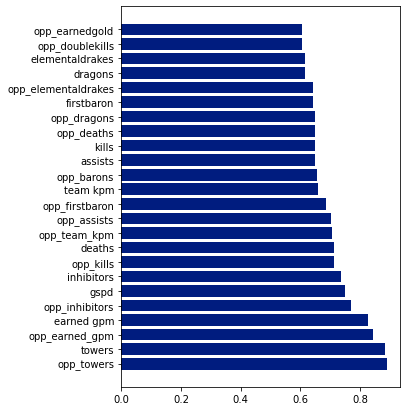

In [52]:
plt.figure(figsize = (5, 7))
#plt.xticks(rotation = 90)
plt.barh(above_thresh_names, above_thresh_values)

### modelo unicamente con los 20 atributos con mayor correlacion

In [53]:
X = df_teams[above_thresh_names]

In [54]:
X.drop('deaths', axis = 1, inplace = True)
X.drop('opp_deaths', axis = 1, inplace = True)
X.drop('elementaldrakes', axis = 1, inplace = True)
X.drop('opp_elementaldrakes', axis = 1, inplace = True)

C:\Users\kesha\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
Y = df_teams['result']

In [56]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [57]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [58]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [59]:
clf_importance.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [60]:
Ypred = clf_importance.predict(Xtest)

In [61]:
metrics.f1_score(Ytest, Ypred, average='macro')

0.9910358717760694

### Cross Validation con los mismos 20 atributos

In [62]:
X = df_teams[above_thresh_names]

In [63]:
X.drop('deaths', axis = 1, inplace = True)
X.drop('opp_deaths', axis = 1, inplace = True)
X.drop('elementaldrakes', axis = 1, inplace = True)
X.drop('opp_elementaldrakes', axis = 1, inplace = True)

C:\Users\kesha\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
Y = df_teams['result']

In [65]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [66]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [67]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [68]:
cv_results

array([0.99127676, 0.99047619, 0.99203822, 0.98977183, 0.99693721,
       0.99066874, 0.99315589, 0.99461124, 0.98924731, 0.99217527])

In [69]:
cv_results_list = cv_results.tolist()

In [70]:
sorted_results = sorted(cv_results_list, reverse = True)

In [71]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9920 (+/- 0.0045)


In [72]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9969


In [73]:
matrix_best = ("Best score: %0.4f" % (sorted_results[0]))

In [74]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9892


# No se uso seleccion univariada de atributos porque existen columnas con valores negativos, y pierden su significancia si son alterados

# Comparando los atributos mas importantes segun matriz de correlacion contra los atributos mas importantes segun el modelo

In [75]:
above_thresh_names = ['opp_towers',
 'towers',
 'opp_earned_gpm',
 'earned gpm',
 'opp_inhibitors',
 'gspd',
 'inhibitors',
 'opp_kills',
 'opp_team_kpm',
 'opp_assists',
 'opp_firstbaron',
 'team kpm',
 'opp_barons',
 'assists',
 'kills',
 'opp_dragons',
 'firstbaron',
 'dragons',
 'opp_doublekills',
 'opp_earnedgold']

In [76]:
above_thresh_values = [0.8901373176107132,
 0.8823298412669925,
 0.8433143396067136,
 0.8275655866333085,
 0.76872556885389,
 0.7501027214637753,
 0.7376836216123817,
 0.7135747920501458,
 0.7077045700557374,
 0.7041109000019554,
 0.6852898033585781,
 0.6577418497344966,
 0.6555922646231906,
 0.6506891871178019,
 0.6499121889000263,
 0.6477472344579055,
 0.6420016836947757,
 0.6170631930271167,
 0.605690404029703,
 0.6056421679457699]

In [77]:
above_thresh_list = [[above_thresh_names[i], above_thresh_values[i]] for i in range(len(above_thresh_names))]

In [78]:
for i in range(len(above_thresh_list)):
    print("feature importance: ", feat_importance_list[i][0], ": ", 
          feat_importance_list[i][1]," | ", "matrix correlation: ", 
          above_thresh_list[i][0], ": ", above_thresh_list[i][1])
    print("-----------------------------------------------------")

feature importance:  towers :  0.09151523020090062  |  matrix correlation:  opp_towers :  0.8901373176107132
-----------------------------------------------------
feature importance:  opp_towers :  0.07833709063716576  |  matrix correlation:  towers :  0.8823298412669925
-----------------------------------------------------
feature importance:  opp_inhibitors :  0.07567334445026973  |  matrix correlation:  opp_earned_gpm :  0.8433143396067136
-----------------------------------------------------
feature importance:  inhibitors :  0.0543619186538892  |  matrix correlation:  earned gpm :  0.8275655866333085
-----------------------------------------------------
feature importance:  firstbaron :  0.051744168413892566  |  matrix correlation:  opp_inhibitors :  0.76872556885389
-----------------------------------------------------
feature importance:  opp_firstbaron :  0.04942105938412081  |  matrix correlation:  gspd :  0.7501027214637753
----------------------------------------------------

# Cuantos atributos coinciden?

In [83]:
f_i_20 = f_i_l_n[:20]

In [85]:
suma = 0
for i in above_thresh_names:
    if i in f_i_20:
        print(i)
        suma += 1
        
print(suma, "/ 20 atributos coinciden")

opp_towers
towers
opp_earned_gpm
earned gpm
opp_inhibitors
gspd
inhibitors
opp_team_kpm
opp_assists
opp_firstbaron
opp_barons
kills
opp_dragons
firstbaron
dragons
opp_doublekills
opp_earnedgold
17 / 20 atributos coinciden


In [86]:
for i in above_thresh_names:
    if i not in f_i_20:
        print(i)

opp_kills
team kpm
assists


# Comparacion de mejor puntuacion de modelos

### Matriz de correlacion

In [79]:
print(matrix_best)

Best score: 0.9969


### Feature importance

In [80]:
print(feature_best)

Best score: 0.9992


# Referencia
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e